## Introduction to Scikit-Learn and Pandas
Artifical Intelligence and Machine Learning Symposium at OU
Univeristy of Oklahoma Memorial Union Ballroom
September 25, 2019 Author: Keerti Banweer keerti.banweer@ou.edu

## Overview: Dimensionality reduction and Clustering (Breast Cancer dataset)
Below are the topics that will be covered in this section:

1. Load the dataset using sklearn.datasets
2. Describe the dataset using DESCR
3. Check for missing values using numpy functions isnan() and any()
4. Scale the data using sklearn scaler (we will be using min max scaler)
5. Dimensionality reduction using PCA and tSNE functions in Sklearn
6. build the models using sklearn packages: Kmeans
7. Evaluate the predictions, check accuracy
8. visualizing the clusters with different graphs 
   compare different models using cross validation (sklearn.model_selection.cross_validate )

### General References
* [Sci-kit Learn API](https://scikit-learn.org/stable/modules/classes.html)

Clustering is a technique of identifying similar instances and assigning them to clusters 


## IMPORTS

In [132]:
# Index of sklearn datasets https://scikit-learn.org/stable/datasets/index.html #datasets
# https://scikit-learn.org/stable/modules/classes.html
# module-sklearn.datasets

"""
This section will import all the required packages for this tutorial

"""

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn import cluster, datasets

import numpy as np
import pandas as pd
import itertools 
import time

from matplotlib import rcParams, pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics.cluster import contingency_matrix 
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.decomposition import PCA


%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = (8, 8)

globalStart = time.time()


## Data Preprocessing
In this section, we will understand and visualize structure of breast cancer dataset from sklearn.
feature_names will lists all the names of the different attributes
target_names are the names of the classes


In [133]:
"""
1. We will load breast cancer dataset
2. Using the function keys(), we will display all the keys of the dataset
3. DESCR will describe the dataset. It includes the list of attributes and their meaning. 
"""

#loading breast cancer dataset 
bc_dataset = datasets.load_breast_cancer()

## Display the keys
print(bc_dataset.keys())

## Describe the dataset
print (bc_dataset.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [146]:
"""
Store the data in variable X and using pandas, we convert it into a dataframe
Feature names and target names are available under keys: feature_names and target_names respectively
"""

X = bc_dataset.data
y = bc_dataset.target

feat_names = bc_dataset.feature_names
targ_names = bc_dataset.target_names

print ("SETUP BC_Dataset")
print (X.shape, y.shape)
print ("Features: \n" + str(feat_names))
print ("Targets: \n" + str(targ_names))

SETUP BC_Dataset
(569, 30) (569,)
Features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: 
['malignant' 'benign']


In [135]:
""" 
Store the number of samples and the number of features, by
accessing the values from the shape of X
"""
nsamples = X.shape[0]
nfeatures = X.shape[1]

print("Number of samples: " + str(nsamples))
print("Number of features: " + str(nfeatures))


Number of samples: 569
Number of features: 30


In [136]:
## Breast cancer dataset loaded in the form of dictionary
## changing it to pandas dataframe for more features

# data = np.c_[bc_dataset.data, bc_dataset.target]
# columns = np.append(bc_dataset.feature_names, ["target"])
data_bc = pd.DataFrame(X, columns=bc_dataset.feature_names)

# Data clean up

Check for any missing values using isna() and any(). 
We can use functions like head() and tail() to view top 5 and bottom 5 rows of the dataframe. 

In [137]:
"""
Using head() fucntion, we can check top 5 rows of the dataframe
"""
data_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
"""
Using tail() function we can check last 5 rows
"""
data_bc.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Check for missing values

In [139]:
""" 
Determine whether any data are NaN. Use isna() and
any() to obtain a summary of which features have at 
least one missing value
"""
print(data_bc.isna().any(axis=0))

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [140]:
"""
List of attributes
"""
pred_names = data_bc.columns
print(pred_names)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


# Histogram of the features

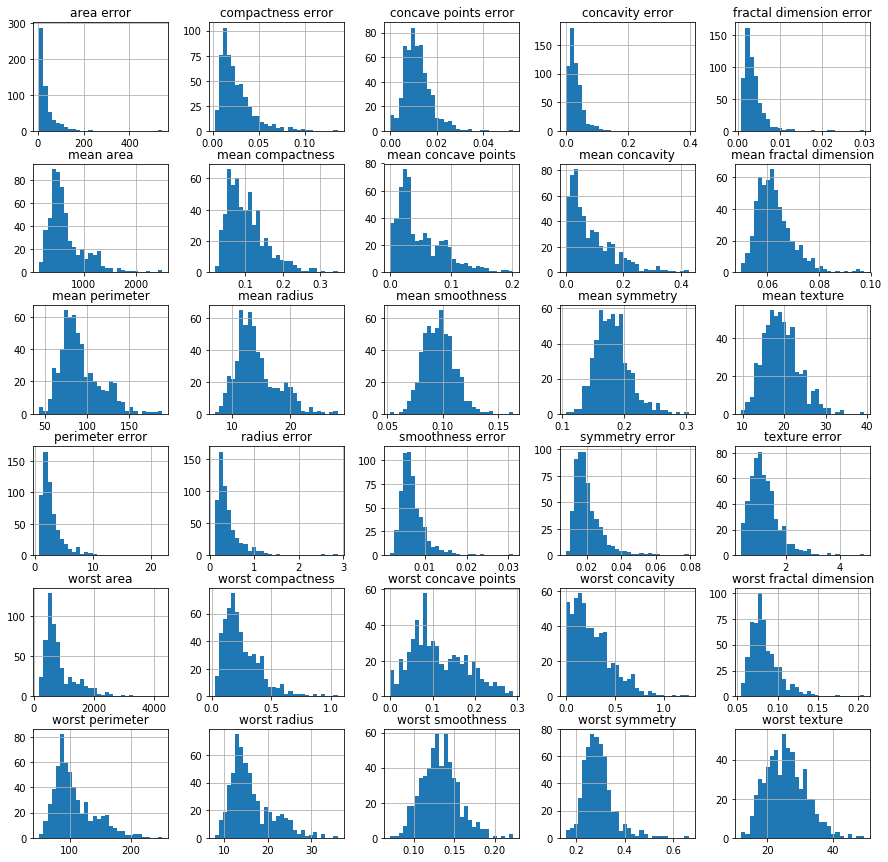

In [141]:
"""
HISTOGRAMS OF THE PREDICTOR FEATURES 
"""
# fig, a = plt.subplots(5, 6, figsize=(15,15))
# fig.subplots_adjust(wspace=0.55,hspace=0.45)
# a = a.ravel()
# for idx, ax in enumerate(a):
# #     pred_data = bc_dataset['data'][:,np.where(bc_dataset['feature_names'] == pred_names[idx])]
#     ax.hist(pred_data.reshape(pred_data.size), bins = 30)
#     ax.set_title(pred_names[idx])
#     ax.plot()

data_bc.hist(bins=30, figsize=(15,15))
a =1

## Normalizing and Scaling the dataset

In [142]:
"""
Use Min-Max scaler from sklearn
"""
minmax_scaler = MinMaxScaler()
minmax_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

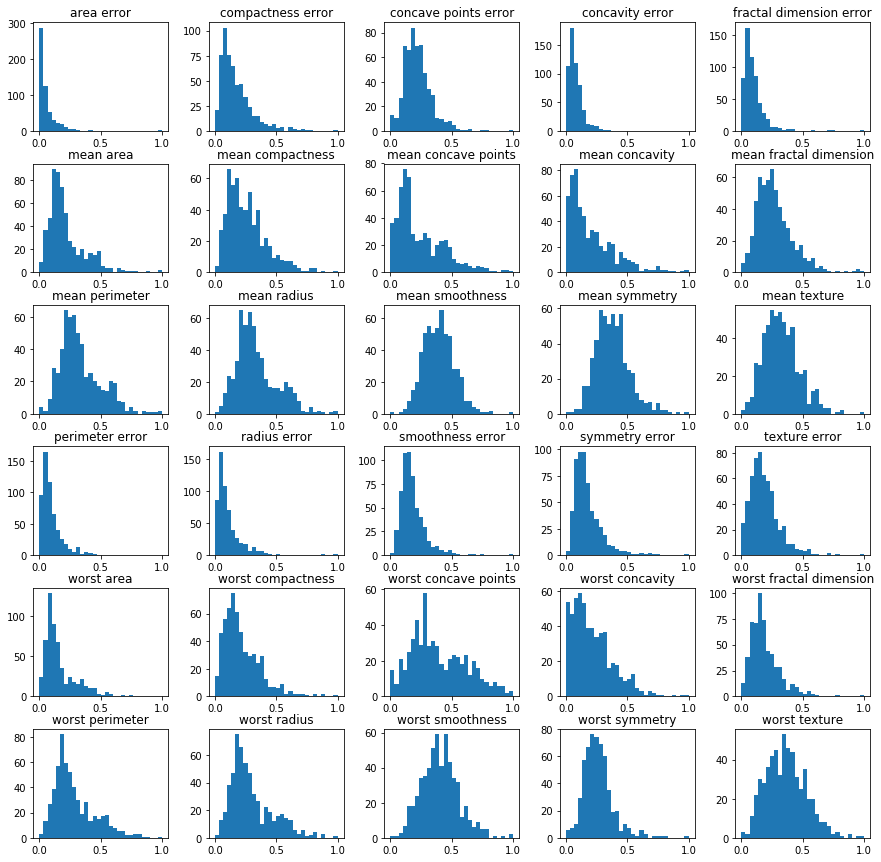

In [143]:
Xclean_minmax = minmax_scaler.fit_transform(data_bc.values[:, 0:30])
df = pd.DataFrame(Xclean_minmax, columns=feat_names)
df.hist(bins = 30,  grid=False, figsize=(15,15))
a = 1

## PCA for Dimensionality Reduction

[0.98204467 0.01617649 0.00155751]
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.5

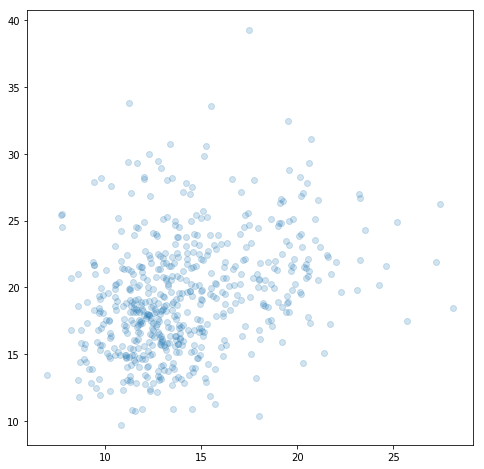

In [127]:
"""
Principal Component Analysis (PCA) is one of the popular dimensionality reduction algorithm
Visualize using bar plot
"""
pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.components_)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

pca_df = pd.DataFrame(columns = ['pca1','pca2', 'pca3'])
pca_df['pca1'] = X2D[:,0]
pca_df['pca2'] = X2D[:,1]
pca_df['pca3'] = X2D[:,2]

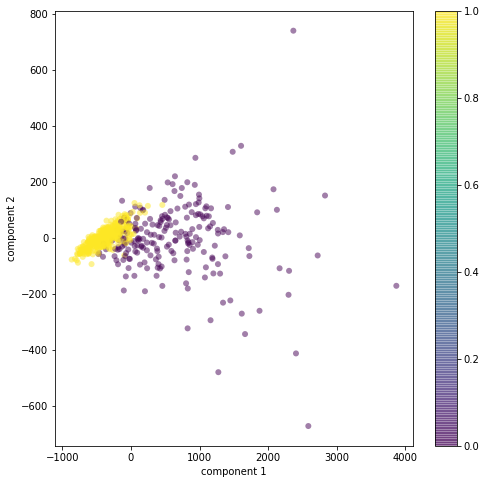

In [129]:
# Plot first two principal components of each point to analyze the data:

plt.scatter(X2D[:, 0], X2D[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [110]:
pca_df[:5]

,pca1,pca2,pca3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


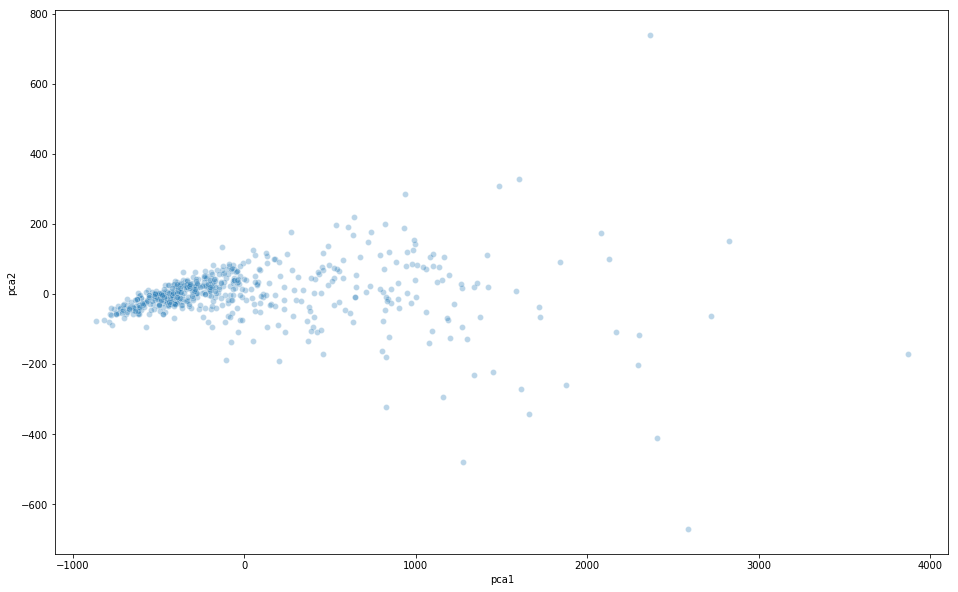

In [130]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    palette=sns.color_palette(),
#     palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

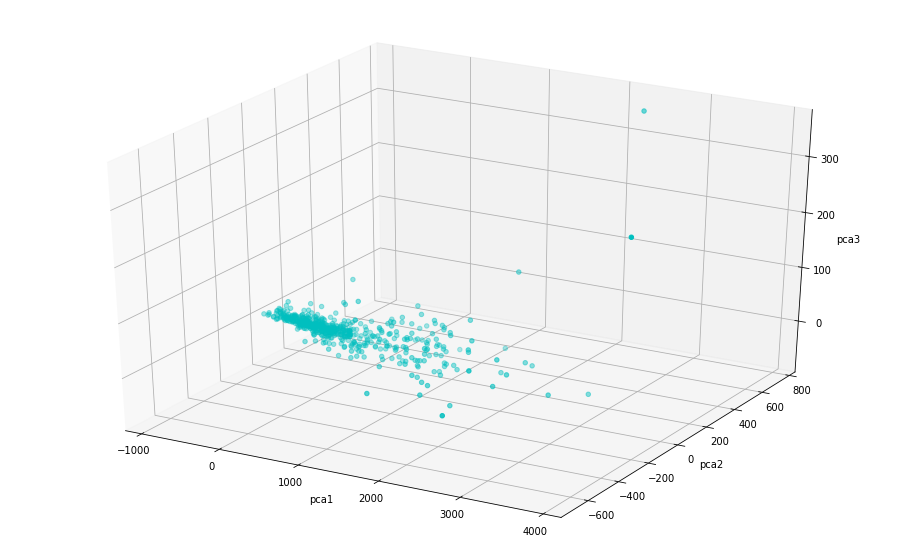

In [131]:
## 3D version of the same plot

# num_classes = len(np.unique(colors))
# palette = np.array(sns.color_palette("hls", num_classes))
colors = ["r", "b"]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df["pca1"], 
    ys=pca_df["pca2"], 
    zs=pca_df["pca3"],
    c="c",
    cmap='tab10'
)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

## tSNE for dimensionality reduction

In [113]:
#Also use tSNE for dimensionality reduction
##T-Distributed Stochastic Neighbouring Entities (t-SNE)

tsne_model = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400)
tsne_results = tsne_model.fit_transform(X)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.503052
[t-SNE] KL divergence after 400 iterations: 0.261510


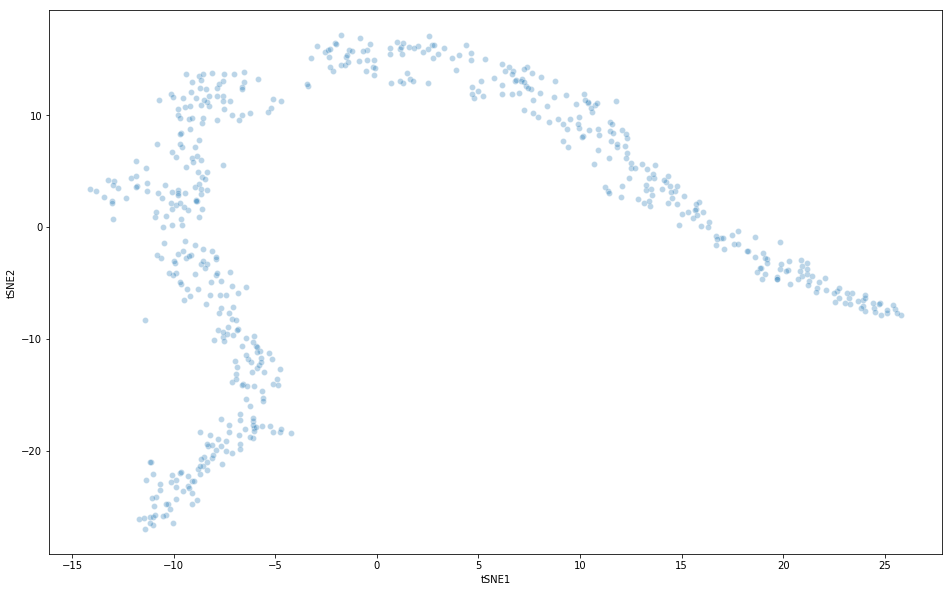

In [114]:
## In this section we will use seaborn to visualize
tsne_df = pd.DataFrame(columns = ['tSNE1','tSNE2'])
tsne_df['tSNE1'] = tsne_results[:,0]
tsne_df['tSNE2'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tSNE1", y="tSNE2",
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

# Clustering

In [115]:
"""
Train a KMeans cluster for breast cancer dataset
We need to specify the number of clusters that algorithm will find
In the next section, we will compare the clusters with n_clusters 2, 4, 8
"""

selected_features = ['mean radius', 'mean concavity', 'mean symmetry']
kmeans = KMeans(n_clusters=2)
features = np.array(data_bc[selected_features])
print("Dimensions of features: " + str(features.shape))
kmeans.fit(features)

Dimensions of features: (569, 3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
"""
Centroids and labels
"""

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

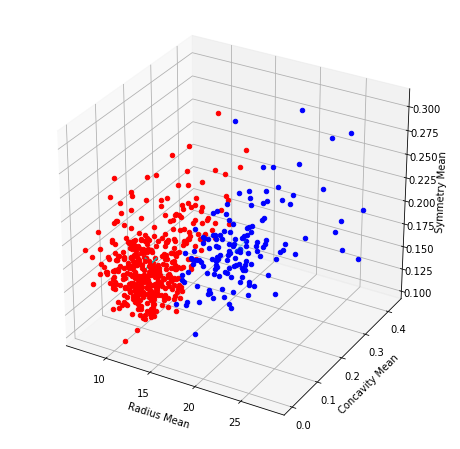

In [117]:
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
colors = ["r", "b", "g"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2], c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2], marker="x", s=150, c="c")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Concavity Mean")
ax.set_zlabel("Symmetry Mean")
plt.show()


#### CLUSTERING IRIS DATASET

In [118]:
# RETREIVING CLUSTER EXAMPLE INDICIES
def get_examples_in_cluster_c(estimator, X, c):
    nclusters = estimator.cluster_centers_.shape[0]
    inds = np.where(estimator.labels_ == c)[0]
    return inds


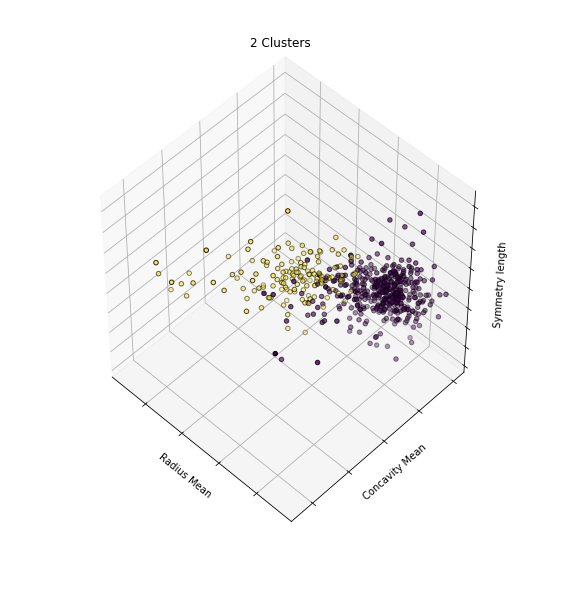

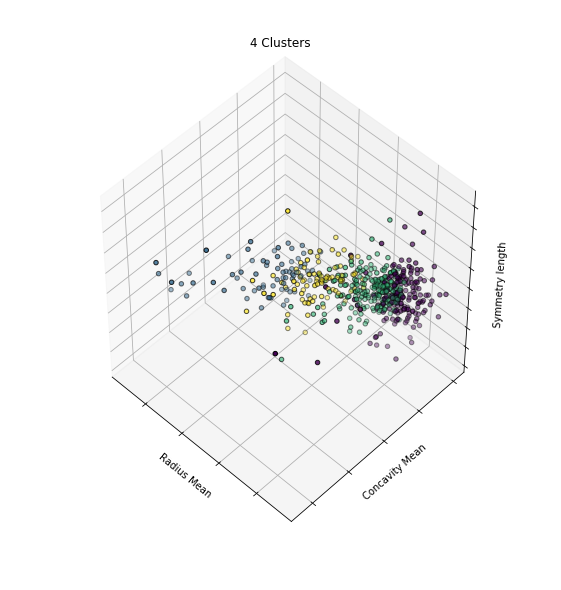

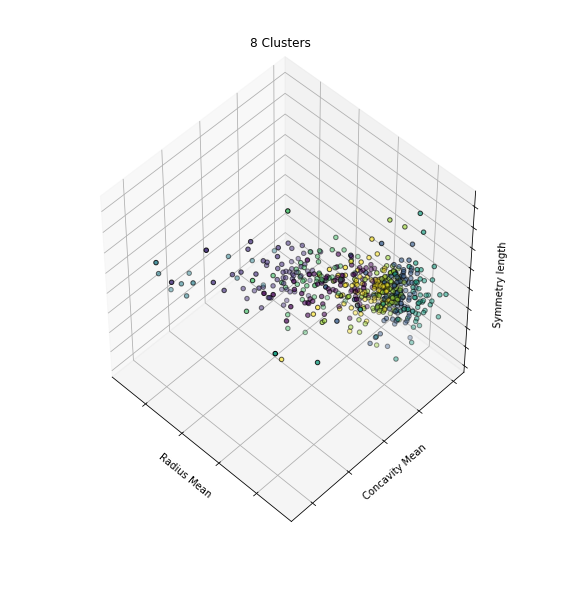

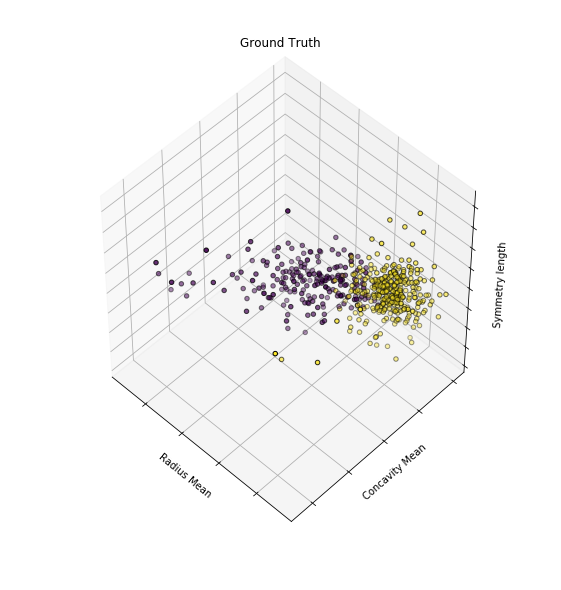

In [119]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
features_diff = np.array(data_bc[selected_features])
kmeans = KMeans(n_clusters=2)
kmeans.fit(features_diff)

# Observing different Cluster counts
'''
TUTORIAL NOTES: Just have them play with different cluster sizes in the constructors
'''
estimators = [('2_clusters1', KMeans(n_clusters=2)),
              ('4_clusters2', KMeans(n_clusters=4)),
              ('8_clusters', KMeans(n_clusters=8))]
titles = ['2 Clusters','4 Clusters','8 Clusters']

plt.figure(1)
for i, (name, est) in enumerate(estimators):
    (fig, sub) = plt.subplots(2, 2, num=i+1)
    xx = int(i > 1)
    yy = i % 2
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(features_diff)
    labels = est.labels_

    ax.scatter(features_diff[:, 0], features_diff[:, 1], features_diff[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Radius Mean')
    ax.set_ylabel('Concavity Mean')
    ax.set_zlabel('Symmetry length')
    ax.set_title(titles[i])
    ax.dist = 12
    plt.show()

# Plot the ground truth
fig = plt.figure(4)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for label, name in enumerate(targ_names):
    ax.text3D(features[y == label, 0].mean(),
              features[y == label, 1].mean(),
              features[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [0, 1, 2]).astype(np.float)
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry length')
ax.set_title('Ground Truth')
ax.dist = 12
plt.show()

## Clustering using AffinityPropagation

In [145]:
# cluster_affinity = AffinityPropagation(damping=0.5, max_iter=300, affinity='euclidean', verbose=False)
cluster_affinity = AffinityPropagation()
data_affinity = np.array(features_diff)
clus_aff = cluster_affinity.fit(features)

print(clus_aff.cluster_centers_)
print(clus_aff.labels_)

[[11.42     0.2414   0.2597 ]
 [12.45     0.1578   0.2087 ]
 [13.71     0.09366  0.2196 ]
 ...
 [14.05     0.04462  0.1537 ]
 [11.2      0.       0.106  ]
 [15.22     0.255    0.2128 ]]
[219 242 242   0 242   1 219   2   3   4   5   6 219   7   8   9  10  18
 242  11  12  13  14 245 212 311  15 219  16 311 219  17 311 219  18 311
  19  20  21  22  23  24 219  25  26 219  27  28  29  30  31  32  33 219
  34  35 219  36  37  27  38  27  39  40  41  42  43  44  40  45 219  40
 311  46  47  48  49 219 242  50  51  52 221 219  53 219  54 219  55  56
  57  58  59  60  61 242  62 124  63  64  65  27  66 171 193  67  68  69
 245  70  90  71  72 193  40  73  40  74  75 219  76 219 221  77  78  79
  80 219  81 242  82  83  18  84 219  85  86  87  88  89  90  91  92  93
 376  94  95  96  97  98  99  27 345 100 101 102 311 311 103 104 105 219
 242 106 221 107 376 311 311 108 109 110 111 112 166  27 220 212 113 114
 115 245 116 117 118 220 219 119 120 121 122 123 124 125 126 127 128 219
 219 129 13

In [159]:
# display affinity propagation clustering method

#### CLUSTERING BREAST CANCER DATASET

In [75]:
# analysing, visualizing dataset

###############################
# RUN THIS CELL BEFORE CODING #
###############################

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.savefig('confusion_mtx', bbox_inches="tight")
    

Confusion matrix, without normalization
[[122  90]
 [  2 355]]
Cosine similarity between between the clusters:
 0.9911
Average Euclidean distance (c0):
 18.8364
Average Euclidean distance (c1):
 254.8121


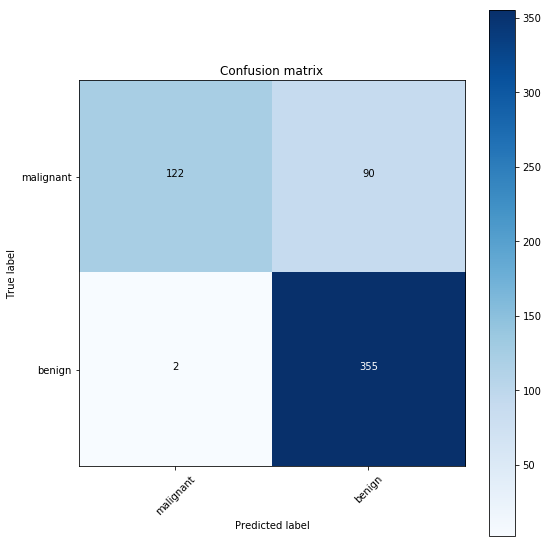

In [134]:
# Set up constants
n_clusters = len(targ_names)
n_samples = X.shape[0]
n_feats = X.shape[1]
n_bins = int(np.sqrt(n_samples))

'''
Feature space and cluster sizes can be changed
'''
# Train model on all the examples, with a certain set of features. 
# Observe different cluster and feat_spaces. Using the entire fesature space results
# in worst performance
feat_space = range(1,5,1)
kmeans = KMeans(n_clusters=n_clusters)
preds = kmeans.fit_predict(X[:,feat_space]) 

# get the examples from each cluster
c0 = kmeans.cluster_centers_[0,:]
c1 = kmeans.cluster_centers_[1,:]
c0Inds = get_examples_in_cluster_c(kmeans, X, 0)
c1Inds = get_examples_in_cluster_c(kmeans, X, 1)

# Basic Evaluation and Similarity Measures
cmtx = contingency_matrix(y, preds)
cossim = np.mean(cosine_similarity(X[c0Inds,:], X[c1Inds,:]))
distc0 = np.zeros((c0Inds.shape[0],n_feats), float)
distc1 = np.zeros((c1Inds.shape[0],n_feats), float)
# cluster 0 : average distance of example points
for i in range(c0Inds.shape[0]):
    x = X[i,feat_space]
    distc0[i,0] = paired_euclidean_distances(x.reshape(1, -1), c0.reshape(1, -1))
# cluster 1 : average distance of example points
for i in range(c1Inds.shape[0]):
    x = X[i,feat_space]
    distc1[i,] = paired_euclidean_distances(x.reshape(1, -1), c1.reshape(1, -1))


plot_confusion_matrix(cmtx, targ_names)
print ("Cosine similarity between between the clusters:\n %.04f" % cossim)
print ("Average Euclidean distance (c0):\n %.04f" % np.mean(distc0))
print ("Average Euclidean distance (c1):\n %.04f" % np.mean(distc1))


#### Visualizing the Clusters

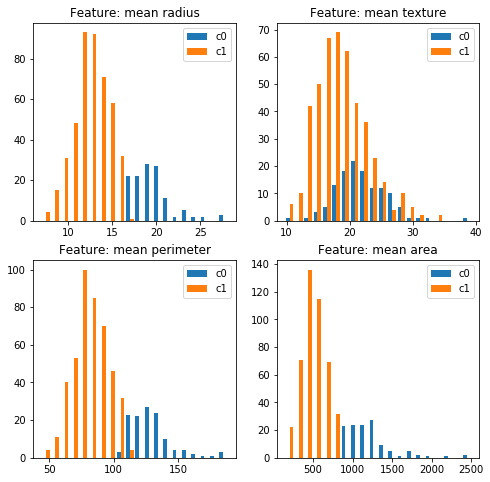

In [135]:

# Observe the relative distributions for some of the features based on their respective cluster
# Observe any additional features
# Compute Kullbeck-Leibler distances
plt.figure(99)
for i, feat in enumerate(feat_names[0:4]):
    plt.subplot(2,2,i+1)
    plt.hist([X[c0Inds,i], X[c1Inds,i]], bins=20, label=['c0','c1'])
    plt.title("Feature: %s" % feat_names[i])
    plt.legend()
    